# Desafio EDA Netflix

Este notebook realiza a Análise Exploratória de Dados (EDA) do dataset Netflix Daily Top 10, focando nos requisitos do desafio.

### Configuração e Carregamento

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define opções para melhor visualização (exibir todas as colunas)
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Carrega a base de dados
base = pd.read_csv("netflix_daily_top_10.csv")

print("Base de dados carregada com sucesso.")

Base de dados carregada com sucesso.


# Tamanho da Base de Dados

In [18]:
# Imprime o número total de linhas (registros) e colunas na base.
print(f"A base contém {base.shape[0]} registros e {base.shape[1]} colunas.")

A base contém 7100 registros e 10 colunas.


# Tipos de Dados Disponíveis

In [19]:
# Analisa os tipos de dados de cada coluna.
base.dtypes
# Insight: A maioria das colunas é 'object' (strings). As colunas de data precisam de conversão.

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

# Verificar Dados Nulos

Contagem de valores nulos e Tipos de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


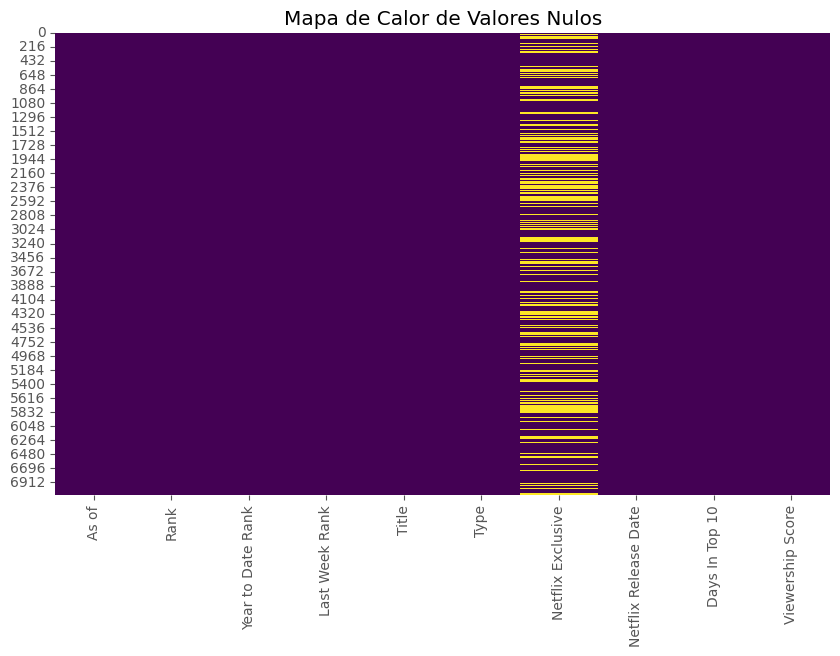

In [20]:
# Analisa a contagem de valores não nulos para detectar ausências.
print("Contagem de valores nulos e Tipos de Dados:")
base.info()
# Insight: A coluna 'Netflix Exclusive' possui 2501 valores nulos (NaN).

# Visualiza graficamente a distribuição dos valores nulos com um mapa de calor.
plt.figure(figsize=(10, 6))
sns.heatmap(base.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.savefig('null_heatmap.png')
plt.show()

# Período da Análise Feita

In [21]:
# Converte as colunas de data (strings) para o tipo datetime, permitindo operações.
base['As of'] = pd.to_datetime(base['As of'])
base['Netflix Release Date'] = pd.to_datetime(base['Netflix Release Date'])

# Extrai e imprime as datas mínima e máxima da coluna 'As of'.
data_inicio = base['As of'].min().strftime('%Y-%m-%d')
data_fim = base['As of'].max().strftime('%Y-%m-%d')
print(f"O período da análise abrange de {data_inicio} a {data_fim}.")

# Trata os nulos em 'Netflix Exclusive' preenchendo com 'No' (limpeza essencial).
base['Netflix Exclusive'] = base['Netflix Exclusive'].fillna('No')

# Cria a feature 'Age at Top 10' para análises futuras de ML (popularidade vs. idade).
base['Age at Top 10 (Days)'] = (base['As of'] - base['Netflix Release Date']).dt.days

O período da análise abrange de 2020-04-01 a 2022-03-11.


# Outliers

In [22]:
# Usa o describe() para identificar Outliers (Máximo muito distante do 75% Quartil) nas métricas de desempenho.
print("Análise Estatística para confirmação de Outliers:")
base[['Days In Top 10', 'Viewership Score']].describe()
# Insight: Os valores máximos muito altos confirmam a existência de outliers extremos que serão visualizados a seguir.

Análise Estatística para confirmação de Outliers:


,Days In Top 10,Viewership Score
count,7100.000000,7100.000000
mean,24.123662,122.790141
std,58.473789,213.861642
min,1.000000,1.000000
25%,3.000000,19.000000
50%,7.000000,50.000000
75%,18.000000,128.000000
max,428.000000,1474.000000


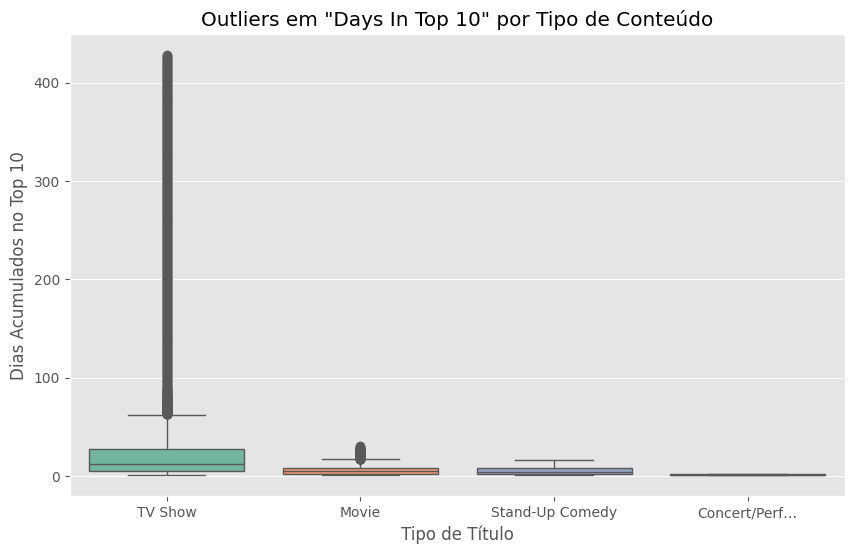

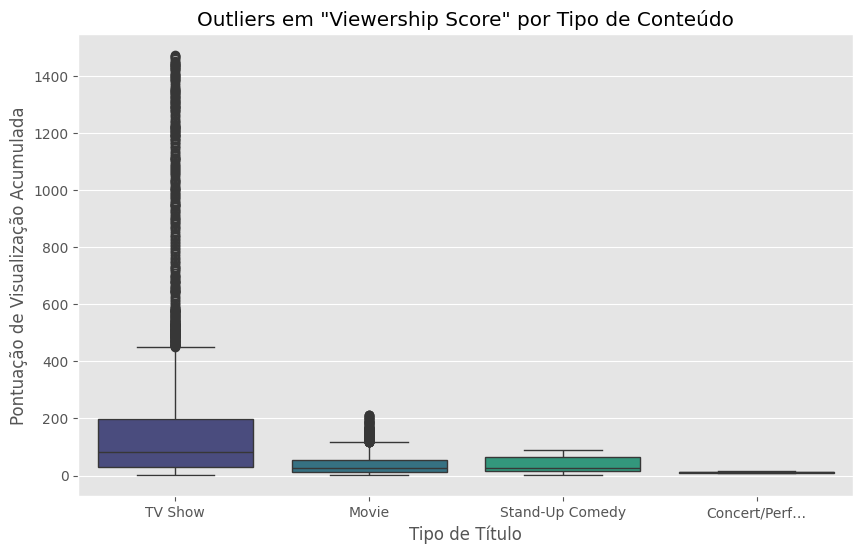

In [24]:
# Boxplot para visualizar a distribuição e a concentração de outliers em 'Days In Top 10'.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Days In Top 10', data=base, hue='Type', palette='Set2', legend=False)
plt.title('Outliers em "Days In Top 10" por Tipo de Conteúdo')
plt.xlabel('Tipo de Título')
plt.ylabel('Dias Acumulados no Top 10')
plt.savefig('days_in_top10_outliers.png')
plt.show() 

# Boxplot para visualizar a distribuição e a concentração de outliers em 'Viewership Score'.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Viewership Score', data=base, hue='Type', palette='viridis', legend=False)
plt.title('Outliers em "Viewership Score" por Tipo de Conteúdo')
plt.xlabel('Tipo de Título')
plt.ylabel('Pontuação de Visualização Acumulada')
plt.savefig('score_outliers.png')
plt.show()

In [25]:
# Identifica o título específico que detém o outlier máximo de 'Viewership Score'.
print("Título com o Outlier Máximo de Viewership Score:")
maior_score = base[base['Viewership Score'] == base['Viewership Score'].max()]
print(maior_score[['Title', 'Days In Top 10', 'Viewership Score']])

Título com o Outlier Máximo de Viewership Score:
          Title  Days In Top 10  Viewership Score
6998  Cocomelon             428              1474
